In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = data.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
ytest.shape

(10000,)

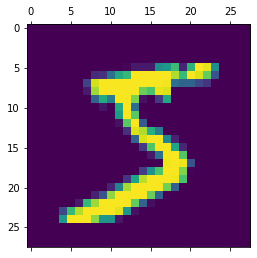

In [8]:
plt.matshow(xtrain[0])

In [9]:
print(ytrain[0])

5


In [10]:
xtrain.shape[1:]

(28, 28)

In [11]:
xtrain = xtrain/255
xtest = xtest/255

In [14]:
model = Sequential()
model.add(LSTM(128,input_shape=xtrain.shape[1:],
               activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='sigmoid'))

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=3,validation_data=(xtest,ytest))

Epoch 1/3
1875/1875 [==============================] - 60s 31ms/step - loss: 1.0921 - accuracy: 0.6229 - val_loss: 0.1479 - val_accuracy: 0.9570
Epoch 2/3
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1989 - accuracy: 0.9469 - val_loss: 0.0952 - val_accuracy: 0.9743
Epoch 3/3
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1219 - accuracy: 0.9661 - val_loss: 0.0688 - val_accuracy: 0.9811


In [33]:
y_pred = model.predict(xtest)

In [34]:
ypred = [np.argmax(i) for i in y_pred]

In [35]:
ytest[0]

7

In [36]:
ypred[0]

7

In [24]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypred)

Text(69.0, 0.5, 'Actual')

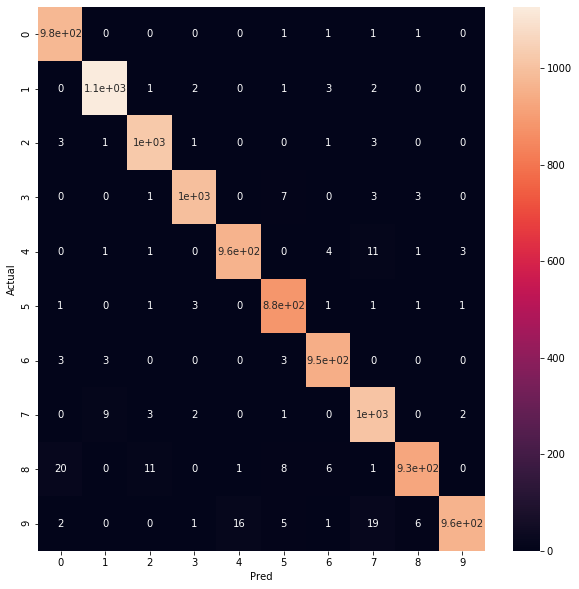

In [26]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Pred')
plt.ylabel('Actual')